# Самостоятельная работа №2. Классификация.

### Задание №4
Датасет **ADULT**
Задание:
1. Загрузить указанный датасет, содержащий сведения об уровне доходов физических лиц
(поле "<=50K").
2. Построить модель, которая определяет уровень доходов человека. Для оценки качества
модели использовать метрику Accuracy.
3. Описать выводы и обосновать основные решения (выбор типа модели, гиперпараметров).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("C:/Users/limon/Downloads/adult.csv")

In [3]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isna().sum()# Проверяем пропуски 

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

In [6]:
#Отредактируем названия столбцов
df.columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex',
              'capital_gain','capital_loss','hours_per_week','native_country','pay']

In [7]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,pay
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
df.pay.unique()

array([' <=50K', ' >50K'], dtype=object)

In [9]:
df.pay.value_counts()

 <=50K    24719
 >50K      7841
Name: pay, dtype: int64

In [10]:
df['pay'] = df['pay'].map({' <=50K': 0, ' >50K': 1}) # Преобразует необходимый столбец в буливы значения

In [11]:
df.pay.value_counts()

0    24719
1     7841
Name: pay, dtype: int64

### Преобразует категориальные данные

In [12]:
df_cat = df[['workclass','education','marital_status','occupation','relationship','race','sex','native_country']]
df_cat.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States


In [13]:
df_cat = pd.get_dummies(df_cat)
df_cat.head()

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
df = df.drop(columns = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country'],axis=1).join(df_cat)
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,pay,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Нормализуем  данные

In [15]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_norm= pd.DataFrame(np_scaled, columns = df.columns)
df_norm.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,pay,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.452055,0.048238,0.800000,0.0,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.138113,0.533333,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.493151,0.151068,0.400000,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.150685,0.221488,0.800000,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.273973,0.184932,0.866667,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
X = df_norm.drop('pay',axis=1).values
y = df_norm['pay'].values

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)

### Логистическая регрессия, LR

In [19]:
lr = LogisticRegression()

In [20]:
lr.fit(X_train,y_train)

LogisticRegression()

In [21]:
prediction_lr = lr.predict(X_test)
accuracy_score(y_test,prediction_lr)

0.8496314496314497

In [22]:
print('Количество неверно классифицируемых объектов : %d из %d'
     % ((y_test != prediction_lr).sum(), X_test.shape[0]))

Количество неверно классифицируемых объектов : 1224 из 8140


In [23]:
mat = confusion_matrix(y_test, lr.predict(X_test))

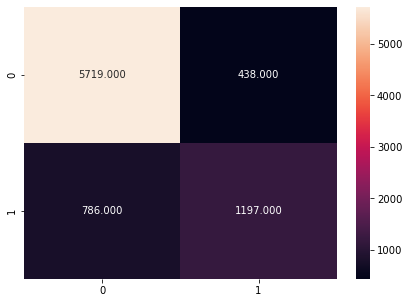

In [24]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(mat, annot = True, fmt = '.3f')
plt.show()

In [25]:
np.mean(cross_val_score(lr, X, y, cv=4))

0.8503992628992629

### Метод опорных векторов, SVM

In [26]:
svc = SVC(degree = 3)

In [27]:
svc.fit(X_train,y_train)

SVC()

In [28]:
prediction_svc = svc.predict(X_test)
accuracy_score(y_test,prediction_svc)

0.836977886977887

### Дерево решений, Decision Trees 

In [29]:
dtc = DecisionTreeClassifier()

In [30]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
prediction_dtc = dtc.predict(X_test)
accuracy_score(y_test,prediction_dtc)

0.8119164619164619

In [32]:
print('Количество неверно классифицируемых объектов : %d из %d'
     % ((y_test != prediction_dtc).sum(), X_test.shape[0]))

Количество неверно классифицируемых объектов : 1531 из 8140


In [33]:
mat = confusion_matrix(y_test, dtc.predict(X_test))

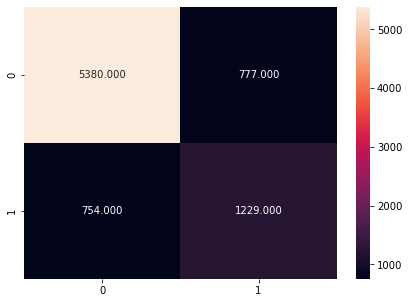

In [34]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(mat, annot = True, fmt = '.3f')
plt.show()

In [35]:
np.mean(cross_val_score(dtc, X, y, cv=4))

0.8146498771498771

In [36]:
dtc_params = {'criterion' : ['gini', 'entropy'],
             'min_samples_split' : [2,3,4,5,10,20],
             'min_samples_leaf' : [1,2,3,4,5,10,20],
             'max_depth' : [None,3,5,10,20]}

In [37]:
dtc_gs = GridSearchCV(dtc, dtc_params, cv=4)
dtc_gs.fit(X, y);

In [38]:
print('Значение гиперпараметра наилучшего классификатора : ', dtc_gs.best_params_,
      '\nАккуратность классификатора : ', dtc_gs.best_score_)                                                                       

Значение гиперпараметра наилучшего классификатора :  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 3} 
Аккуратность классификатора :  0.8577702702702702


### Рандомный лес, Random Forest

In [39]:
clf_rf = RandomForestClassifier(n_estimators = 35, max_depth = 20,
                                bootstrap=True, random_state = 0)

In [40]:
clf_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=35, random_state=0)

In [41]:
prediction_rf = clf_rf.predict(X_test)
accuracy_score(y_test,prediction_rf)

0.8624078624078624

In [42]:
print('Количество неверно классифицируемых объектов : %d из %d'
     % ((y_test != prediction_rf).sum(), X_test.shape[0]))

Количество неверно классифицируемых объектов : 1120 из 8140


In [43]:
mat_rf = confusion_matrix(y_test, clf_rf.predict(X_test))

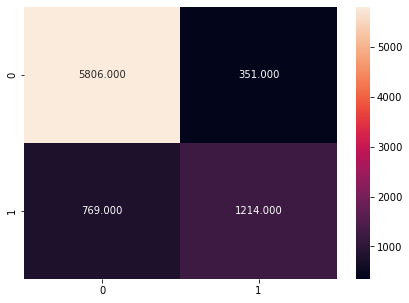

In [44]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(mat_rf, annot = True, fmt = '.3f')
plt.show()

In [45]:
np.mean(cross_val_score(clf_rf, X, y, cv=4))

0.8617936117936118

### Bagging

In [46]:
clf_bag = BaggingClassifier(DecisionTreeClassifier(), bootstrap = 'true', n_estimators=25)

In [47]:
clf_bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap='true',
                  n_estimators=25)

In [48]:
prediction_bag = clf_bag.predict(X_test)
accuracy_score(y_test,prediction_bag)

0.8496314496314497

In [49]:
np.mean(cross_val_score(clf_bag, X, y, cv=4))

0.8503071253071254

In [50]:
print('Количество неверно классифицируемых объектов : %d из %d'
     % ((y_test != prediction_bag).sum(), X_test.shape[0]))

Количество неверно классифицируемых объектов : 1224 из 8140


In [51]:
mat_bag = confusion_matrix(y_test, clf_bag.predict(X_test))

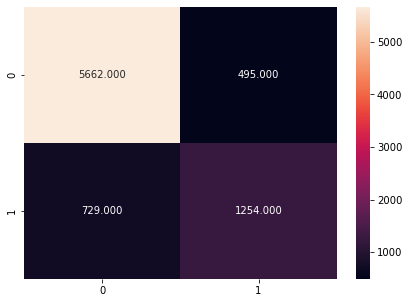

In [52]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(mat_bag, annot = True, fmt = '.3f')
plt.show()

### Boosting

In [53]:
clf_b = GradientBoostingClassifier(n_estimators=100, max_depth = 5)

In [54]:
clf_b.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5)

In [55]:
prediction_b = clf_b.predict(X_test)
accuracy_score(y_test,prediction_b)

0.8740786240786241

In [56]:
np.mean(cross_val_score(clf_b, X, y, cv=4))

0.8717444717444717

In [57]:
print('Количество неверно классифицируемых объектов : %d из %d'
     % ((y_test != prediction_b).sum(), X_test.shape[0]))

Количество неверно классифицируемых объектов : 1025 из 8140


In [58]:
mat_b = confusion_matrix(y_test, clf_b.predict(X_test))

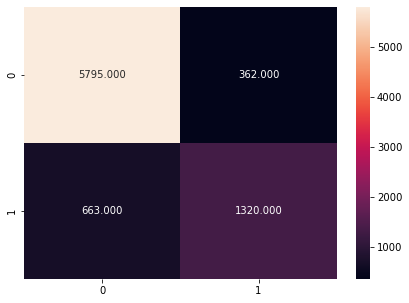

In [59]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(mat_b, annot = True, fmt = '.3f')
plt.show()

## Вывод: Наилучшим вариантом модели будет Градиентный бустинг в количестве 100 деревьев (n_estimators = 100) и c глубиной дерева(max_depth = 5). Мы добились точности около 87.4%